In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#loading the data

In [2]:
df=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
df.shape

(8523, 12)

In [6]:
df_test.shape

(5681, 11)

data preprocessing


In [7]:
#checking features type and null values of 'Train' data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


checking missing values

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#filling missing values for  'Train' dataset

df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace =True)

In [10]:
df['Item_Weight'].isna().sum()

0

In [11]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
df['Outlet_Type']

0       Supermarket Type1
1       Supermarket Type2
2       Supermarket Type1
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object

In [13]:
# Replacing nan in Outlet_Size with its mode (feature contains categorical value)

df['Outlet_Size']=df['Outlet_Size'].fillna(df.Outlet_Size.value_counts().index[0])

In [14]:
df['Outlet_Size'].isna().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


filling missing values for 'test' dataset

In [17]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].median(),inplace=True)

In [18]:
df_test['Item_Weight'].isna().sum()

0

finding categorical values for 'train' and 'test' dataset

In [19]:
df_cat=df[['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
df_cat2=df[['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]

In [20]:
df_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [21]:
df_cat2.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [22]:
print(df['Item_Fat_Content'].unique())
print(df['Item_Type'].unique())
print(df['Outlet_Location_Type'].unique())
print(df['Outlet_Size'].unique())
print(df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Tier 1' 'Tier 3' 'Tier 2']
['Medium' 'High' 'Small']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [23]:
#finding  0 's in Item_visibility
sum(df['Item_Visibility']==0)

526

In [24]:
#replace '0' with mean
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)
df['Item_Visibility'].isna().sum()

0

In [25]:
#combine Item_fat_content
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

creation of new attributes


In [26]:
df['New_Itemtype']=df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Itemtype']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Itemtype, Length: 8523, dtype: object

In [27]:
#replacing the Fd,NC,DR
df['New_Itemtype']=df['New_Itemtype'].replace({"FD":"Food","DR":'Drink',"NC":"Non consumable"})
df['New_Itemtype'].value_counts()

Food              6125
Non consumable    1599
Drink              799
Name: New_Itemtype, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Itemtype               8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Itemtype
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non consumable


In [30]:
df.loc[df['New_Itemtype']=="Non consumable","Item_Fat_Content"]='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Itemtype               8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le=LabelEncoder()

In [34]:
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [35]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Itemtype               8523 non-null   object 
dtypes: float64(4), int32(1), int64(1), object(7)
mem

In [37]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [38]:
df['Item_Type']=le.fit_transform(df['Item_Type'])

In [39]:
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [40]:
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])

In [41]:
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])

In [42]:
df['New_Itemtype']=le.fit_transform(df['New_Itemtype'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Itemtype               8523 non-null   int32  
dtypes: float64(4), int32(6), int64(1), object(2)
mem

In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [45]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [46]:
df_test['Outlet_Size'].isna().sum()

1606

In [47]:
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna(df_test.Outlet_Size.value_counts().index[0])

In [48]:
df_test['Outlet_Size'].isna().sum()

0

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [50]:
#Creating a function to implement LabelEncoder

encoding=LabelEncoder()
def encoder(df,feature):
    df[feature]=encoding.fit_transform(df[feature])

In [51]:
for columns in df_cat2:
    feature=columns
    encoder(df_test,feature)


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int32  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int32  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int32  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int32  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int32  
 9   Outlet_Location_Type       5681 non-null   int32  
 10  Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 333.0 KB


In [53]:
sum(df_test['Item_Visibility']==0)
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)
df['Item_Visibility'].isna().sum()

0

In [54]:
df_test['Item_Fat_Content'].value_counts()

1    3396
2    1935
0     206
4      78
3      66
Name: Item_Fat_Content, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Itemtype               8523 non-null   int32  
dtypes: float64(4), int32(6), int64(1), object(2)
mem

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int32  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int32  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int32  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int32  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int32  
 9   Outlet_Location_Type       5681 non-null   int32  
 10  Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 333.0 KB


In [120]:

x=df.drop(['Item_Identifier','Item_Visibility','Outlet_Identifier','Item_Outlet_Sales'],axis=1)

In [121]:

y=df[['Item_Outlet_Sales']]

In [122]:
type(y)

pandas.core.frame.DataFrame

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Decision Tree regressor 

In [125]:
from sklearn.tree import DecisionTreeRegressor

In [126]:
dtr=DecisionTreeRegressor(criterion='mse',random_state=1,max_depth=5)

In [127]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [128]:
y_pred=dtr.predict(x_test)

In [129]:
y_pred

array([ 692.78750055, 1481.34562426, 2614.97705714, ..., 2987.82255414,
        692.78750055, 1481.34562426])

In [130]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [131]:
print(y_pred)


[ 692.78750055 1481.34562426 2614.97705714 ... 2987.82255414  692.78750055
 1481.34562426]


In [132]:
print(y_test)

      Item_Outlet_Sales
1070           952.7598
6305          1133.8574
8504          4138.6128
5562          1657.1762
1410           679.1160
...                 ...
7275          2922.1962
870            958.7520
3272          4925.5884
4239           624.5204
7883          1270.3464

[2557 rows x 1 columns]


In [133]:
print(x_test)

      Item_Weight  Item_Fat_Content  Item_Type  Item_MRP  \
1070        13.50                 1          8   37.0874   
6305        12.50                 2          3   87.9198   
8504        12.60                 1          9  111.7544   
5562        12.50                 2          3   87.1198   
1410        15.85                 2         13   40.8480   
...           ...               ...        ...       ...   
7275        17.85                 0         14  153.4998   
870          6.75                 2          4   95.6752   
3272        20.35                 0         10  182.4292   
4239         9.60                 1          9   43.6086   
7883        19.00                 0         13  107.6622   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
1070                       2002            1                     1   
6305                       2009            1                     2   
8504                       1985            1                     2   

In [134]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(y_pred,y_test)*100


In [135]:
dtr.score(x_test,y_test)*100

59.373634197534464

In [136]:
dtr.score(x_train,y_train)*100

60.273122431977136

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [138]:
fn=list(x_train)
cn=['692.78750055', '1481.34562426', '2614.97705714','2987.82255414',  '692.78750055',
 '1481.34562426']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(35,25),dpi=500)
plot_tree(dtr,feature_names=fn,class_names=cn,filled=True);
plt.title('Decision_trees_gini',fontsize=40);

# Linear regression

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
model=LinearRegression()

In [141]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
y_pred=model.predict(x_test)

In [143]:
y_pred

array([[ 447.09592862],
       [1869.27861562],
       [3216.14751432],
       ...,
       [3148.08202692],
       [ 437.88364334],
       [1448.73895306]])

In [144]:
model.coef_

array([[ 1.52800537e+00,  1.57869765e+01,  5.05306716e-01,
         1.57140772e+01,  1.32046718e+00, -3.35204160e+02,
        -4.21630164e+02,  1.02033829e+03, -3.71459096e+00]])

In [145]:
model.intercept_

array([-3075.80591712])

In [146]:
model.score(x_test,y_test)*100 #-> R Square

50.95497783244311

In [147]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)*100

50.95497783244311

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [149]:
pipeline=Pipeline([('Sclaer',StandardScaler()),('PCA',PCA(n_components=3,random_state=1)),('rf',RandomForestRegressor(max_depth=3,random_state=1))])

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  New_Itemtype               8523 non-null   int32  
dtypes: float64(4), int32(6), int64(1), object(2)
mem

In [151]:
df.shape

(8523, 13)

In [152]:
rfg=RandomForestRegressor(n_estimators=10,random_state=0)

In [153]:
rfg.fit(x_train,y_train)

<ipython-input-153-58d3d03db7b6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfg.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [154]:
rfgpre=rfg.predict(x_test)

In [155]:
from sklearn.metrics import r2_score
r2_score(y_test,rfgpre)

0.5252407226966634

In [156]:
from sklearn.ensemble import BaggingRegressor

In [157]:
bg = BaggingRegressor(base_estimator=dtr)

In [158]:
bg.fit(x_train,y_train)

C:\Users\Aswani\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=5,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=1,
                                                      splitter='best'),
                 bootstrap=True, b

In [159]:
bg_pred = bg.predict(x_test)

In [160]:
!pip install xgboost

In [161]:
#xgboost regression
from xgboost import XGBRegressor

In [162]:
xgb1=XGBRegressor()

In [163]:
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [164]:
xgb_predict=xgb1.predict(x_test)

In [165]:
xgb1.score(x_train,y_train)

0.8437421698446542

In [166]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,xgb_predict)

In [167]:
mse

1347498.4321829013

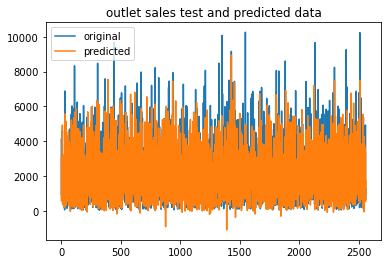

In [115]:
x_axis=range(len(y_test))
plt.plot(x_axis,y_test,label='original')
plt.plot(x_axis,xgb_predict,label='predicted')
plt.title("outlet sales test and predicted data")
plt.legend()
plt.show()


In [118]:
pd.DataFrame(xgb_predict).to_csv('sas.csv',index=False)


In [119]:
print(xgb_predict)

[ 588.24066 1669.691   3019.3147  ... 3352.2236   524.3217  1720.466  ]
